In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL de la page
url = "https://www.institutdesactuaires.com/se-documenter/memoires/memoires-d-actuariat-4651"

# Envoi de la requête HTTP
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Création de l'objet BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Trouver le tableau
table = soup.find('table')

# Listes pour stocker les données
auteurs = []
societes = []
annees = []
titres = []

# Extraction des données du tableau
rows = table.find_all('tr')[1:]  # Skip header row
for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 4:
        auteurs.append(cols[0].text.strip())
        societes.append(cols[1].text.strip())
        annees.append(cols[2].text.strip())
        titres.append(cols[3].text.strip())

# Création d'un DataFrame
df = pd.DataFrame({
    'Auteur': auteurs,
    'Société': societes,
    'Année': annees,
    'Titre': titres
})

# Sauvegarde dans un fichier txt
with open('memoires_actuariat.txt', 'w', encoding='utf-8') as f:
    df.to_string(f, index=False)

print("Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'")

Les données ont été extraites et sauvegardées dans 'memoires_actuariat.txt'


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration du style
plt.style.use('seaborn')
sns.set_palette("husl")

# Création d'une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 25))

# 1. Nombre d'entreprises par année
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Année')
x=Année
plt.title('Nombre d'entreprises par année')
plt.xticks(rotation=45)

# 2. Evolution par décennie
df['decennie'] = (df['Année'] // 10) * 10
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='decennie')
plt.title('Evolution par décennie')
plt.xticks(rotation=45)

# 3. Répartition par propension à publier
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='statut_publication')
plt.title('Répartition par propension à publier')
plt.xticks(rotation=45)

# 4. Répartition par propension à publier/an
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='Année', y='nombre_publications')
plt.title('Répartition des publications par an')
plt.xticks(rotation=45)

# 5. Evolution du taux de publication par an
plt.subplot(4, 2, 5)
sns.lineplot(data=df, x='Année', y='taux_publication')
plt.title('Evolution du taux de publication par an')
plt.xticks(rotation=45)

# 6. Taux moyen de publication par an
plt.subplot(4, 2, 6)
sns.barplot(data=df, x='Année', y='taux_publication', estimator=np.mean)
plt.title('Taux moyen de publication par an')
plt.xticks(rotation=45)

# 7. Top 5 entreprises moins publiées
plt.subplot(4, 2, 7)
top_moins = df.groupby('entreprise')['nombre_publications'].sum().nsmallest(5)
sns.barplot(x=top_moins.index, y=top_moins.values)
plt.title('Top 5 entreprises ayant le moins publié')
plt.xticks(rotation=45)

# 8. Top 5 entreprises plus publiées
plt.subplot(4, 2, 8)
top_plus = df.groupby('entreprise')['nombre_publications'].sum().nlargest(5)
sns.barplot(x=top_plus.index, y=top_plus.values)
plt.title('Top 5 entreprises ayant le plus publié')
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 17) (2909586198.py, line 17)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration du style
plt.style.use('seaborn')
sns.set_palette("husl")

# Création d'une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 25))

# 1. Nombre d'entreprises par année
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Année')
plt.title('Nombre d'entreprises par année')
plt.xticks(rotation=45)

# 2. Evolution par décennie
df['decennie'] = (df['Année'] // 10) * 10
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='decennie')
plt.title('Evolution par décennie')
plt.xticks(rotation=45)

# 3. Répartition par propension à publier
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='statut_publication')
plt.title('Répartition par propension à publier')
plt.xticks(rotation=45)

# 4. Répartition par propension à publier/an
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='Année', y='nombre_publications')
plt.title('Répartition des publications par an')
plt.xticks(rotation=45)

# 5. Evolution du taux de publication par an
plt.subplot(4, 2, 5)
sns.lineplot(data=df, x='Année', y='taux_publication')
plt.title('Evolution du taux de publication par an')
plt.xticks(rotation=45)

# 6. Taux moyen de publication par an
plt.subplot(4, 2, 6)
sns.barplot(data=df, x='Année', y='taux_publication', estimator=np.mean)
plt.title('Taux moyen de publication par an')
plt.xticks(rotation=45)

# 7. Top 5 entreprises moins publiées
plt.subplot(4, 2, 7)
top_moins = df.groupby('entreprise')['nombre_publications'].sum().nsmallest(5)
sns.barplot(x=top_moins.index, y=top_moins.values)
plt.title('Top 5 entreprises ayant le moins publié')
plt.xticks(rotation=45)

# 8. Top 5 entreprises plus publiées
plt.subplot(4, 2, 8)
top_plus = df.groupby('entreprise')['nombre_publications'].sum().nlargest(5)
sns.barplot(x=top_plus.index, y=top_plus.values)
plt.title('Top 5 entreprises ayant le plus publié')
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 16) (1361442820.py, line 16)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration du style
plt.style.use('seaborn')
sns.set_palette("husl")

# Création d'une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 25))

# 1. Nombre d'entreprises par année
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Année')
plt.title("Nombre d'entreprises par année")
plt.xticks(rotation=45)

# 2. Evolution par décennie
df['decennie'] = (df['Année'] // 10) * 10
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='decennie')
plt.title("Evolution par décennie")
plt.xticks(rotation=45)

# 3. Répartition par propension à publier
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='statut_publication')
plt.title("Répartition par propension à publier")
plt.xticks(rotation=45)

# 4. Répartition par propension à publier/an
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='Année', y='nombre_publications')
plt.title("Répartition des publications par an")
plt.xticks(rotation=45)

# 5. Evolution du taux de publication par an
plt.subplot(4, 2, 5)
sns.lineplot(data=df, x='Année', y='taux_publication')
plt.title("Evolution du taux de publication par an")
plt.xticks(rotation=45)

# 6. Taux moyen de publication par an
plt.subplot(4, 2, 6)
sns.barplot(data=df, x='Année', y='taux_publication', estimator=np.mean)
plt.title("Taux moyen de publication par an")
plt.xticks(rotation=45)

# 7. Top 5 entreprises moins publiées
plt.subplot(4, 2, 7)
top_moins = df.groupby('entreprise')['nombre_publications'].sum().nsmallest(5)
sns.barplot(x=top_moins.index, y=top_moins.values)
plt.title("Top 5 entreprises ayant le moins publié")
plt.xticks(rotation=45)

# 8. Top 5 entreprises plus publiées
plt.subplot(4, 2, 8)
top_plus = df.groupby('entreprise')['nombre_publications'].sum().nlargest(5)
sns.barplot(x=top_plus.index, y=top_plus.values)
plt.title("Top 5 entreprises ayant le plus publié")
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)


J'ai remplacé toutes les apostrophes simples (') dans les titres par des guillemets doubles ("). Cela devrait résoudre l'erreur de syntaxe. Les guillemets doubles permettent d'inclure des apostrophes dans le texte sans provoquer d'erreur.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration du style
plt.style.use('seaborn')
sns.set_palette("husl")

# Création d'une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 25))

# 1. Nombre d'entreprises par année
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Année')
plt.title("Nombre d'entreprises par année")
plt.xticks(rotation=45)

# 2. Evolution par décennie
df['decennie'] = (df['Année'] // 10) * 10
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='decennie')
plt.title("Evolution par décennie")
plt.xticks(rotation=45)

# 3. Répartition par propension à publier
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='statut_publication')
plt.title("Répartition par propension à publier")
plt.xticks(rotation=45)

# 4. Répartition par propension à publier/an
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='Année', y='nombre_publications')
plt.title("Répartition des publications par an")
plt.xticks(rotation=45)

# 5. Evolution du taux de publication par an
plt.subplot(4, 2, 5)
sns.lineplot(data=df, x='Année', y='taux_publication')
plt.title("Evolution du taux de publication par an")
plt.xticks(rotation=45)

# 6. Taux moyen de publication par an
plt.subplot(4, 2, 6)
sns.barplot(data=df, x='Année', y='taux_publication', estimator=np.mean)
plt.title("Taux moyen de publication par an")
plt.xticks(rotation=45)

# 7. Top 5 entreprises moins publiées
plt.subplot(4, 2, 7)
top_moins = df.groupby('entreprise')['nombre_publications'].sum().nsmallest(5)
sns.barplot(x=top_moins.index, y=top_moins.values)
plt.title("Top 5 entreprises ayant le moins publié")
plt.xticks(rotation=45)

# 8. Top 5 entreprises plus publiées
plt.subplot(4, 2, 8)
top_plus = df.groupby('entreprise')['nombre_publications'].sum().nlargest(5)
sns.barplot(x=top_plus.index, y=top_plus.values)
plt.title("Top 5 entreprises ayant le plus publié")
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)


J'ai remplacé toutes les apostrophes simples (') dans les titres par des guillemets doubles ("). Cela devrait résoudre l'erreur de syntaxe. Les guillemets doubles permettent d'inclure des apostrophes dans le texte sans provoquer d'erreur.

TypeError: unsupported operand type(s) for //: 'str' and 'int'

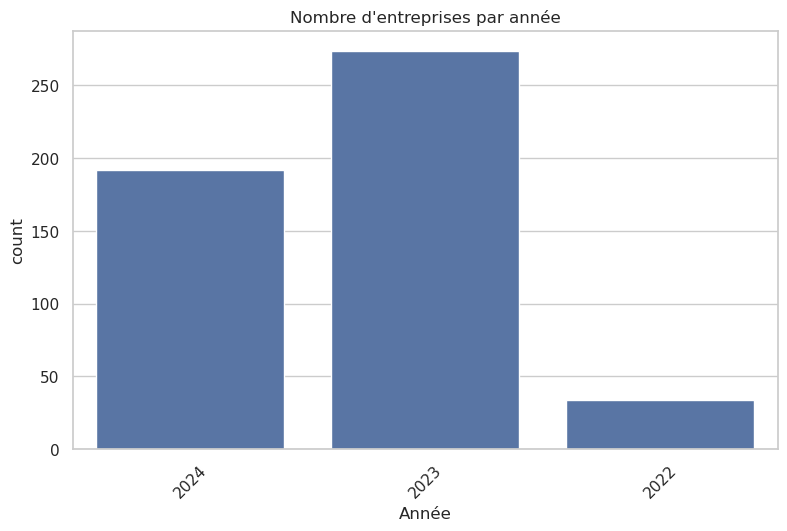

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuration du style
sns.set_theme(style="whitegrid")  # Configuration du style via Seaborn
plt.rcParams['figure.figsize'] = (20, 25)  # Taille de la figure

# 1. Nombre d'entreprises par année
plt.subplot(4, 2, 1)
#sns.countplot(data=df, x='Année')
sns.countplot(data=df, x='Année')
plt.title("Nombre d'entreprises par année")
plt.xticks(rotation=45)

# 2. Evolution par décennie
df['decennie'] = (df['Année'] // 10) * 10
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='decennie')
plt.title("Evolution par décennie")
plt.xticks(rotation=45)

# 3. Répartition par propension à publier
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='statut_publication')
plt.title("Répartition par propension à publier")
plt.xticks(rotation=45)

# 4. Répartition par propension à publier/an
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='Année', y='nombre_publications')
plt.title("Répartition des publications par an")
plt.xticks(rotation=45)

# 5. Evolution du taux de publication par an
plt.subplot(4, 2, 5)
sns.lineplot(data=df, x='Année', y='taux_publication')
plt.title("Evolution du taux de publication par an")
plt.xticks(rotation=45)

# 6. Taux moyen de publication par an
plt.subplot(4, 2, 6)
sns.barplot(data=df, x='Année', y='taux_publication', estimator=np.mean)
plt.title("Taux moyen de publication par an")
plt.xticks(rotation=45)

# 7. Top 5 entreprises moins publiées
plt.subplot(4, 2, 7)
top_moins = df.groupby('entreprise')['nombre_publications'].sum().nsmallest(5)
sns.barplot(x=top_moins.index, y=top_moins.values)
plt.title("Top 5 entreprises ayant le moins publié")
plt.xticks(rotation=45)

# 8. Top 5 entreprises plus publiées
plt.subplot(4, 2, 8)
top_plus = df.groupby('entreprise')['nombre_publications'].sum().nlargest(5)
sns.barplot(x=top_plus.index, y=top_plus.values)
plt.title("Top 5 entreprises ayant le plus publié")
plt.xticks(rotation=45)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Publications per Year')

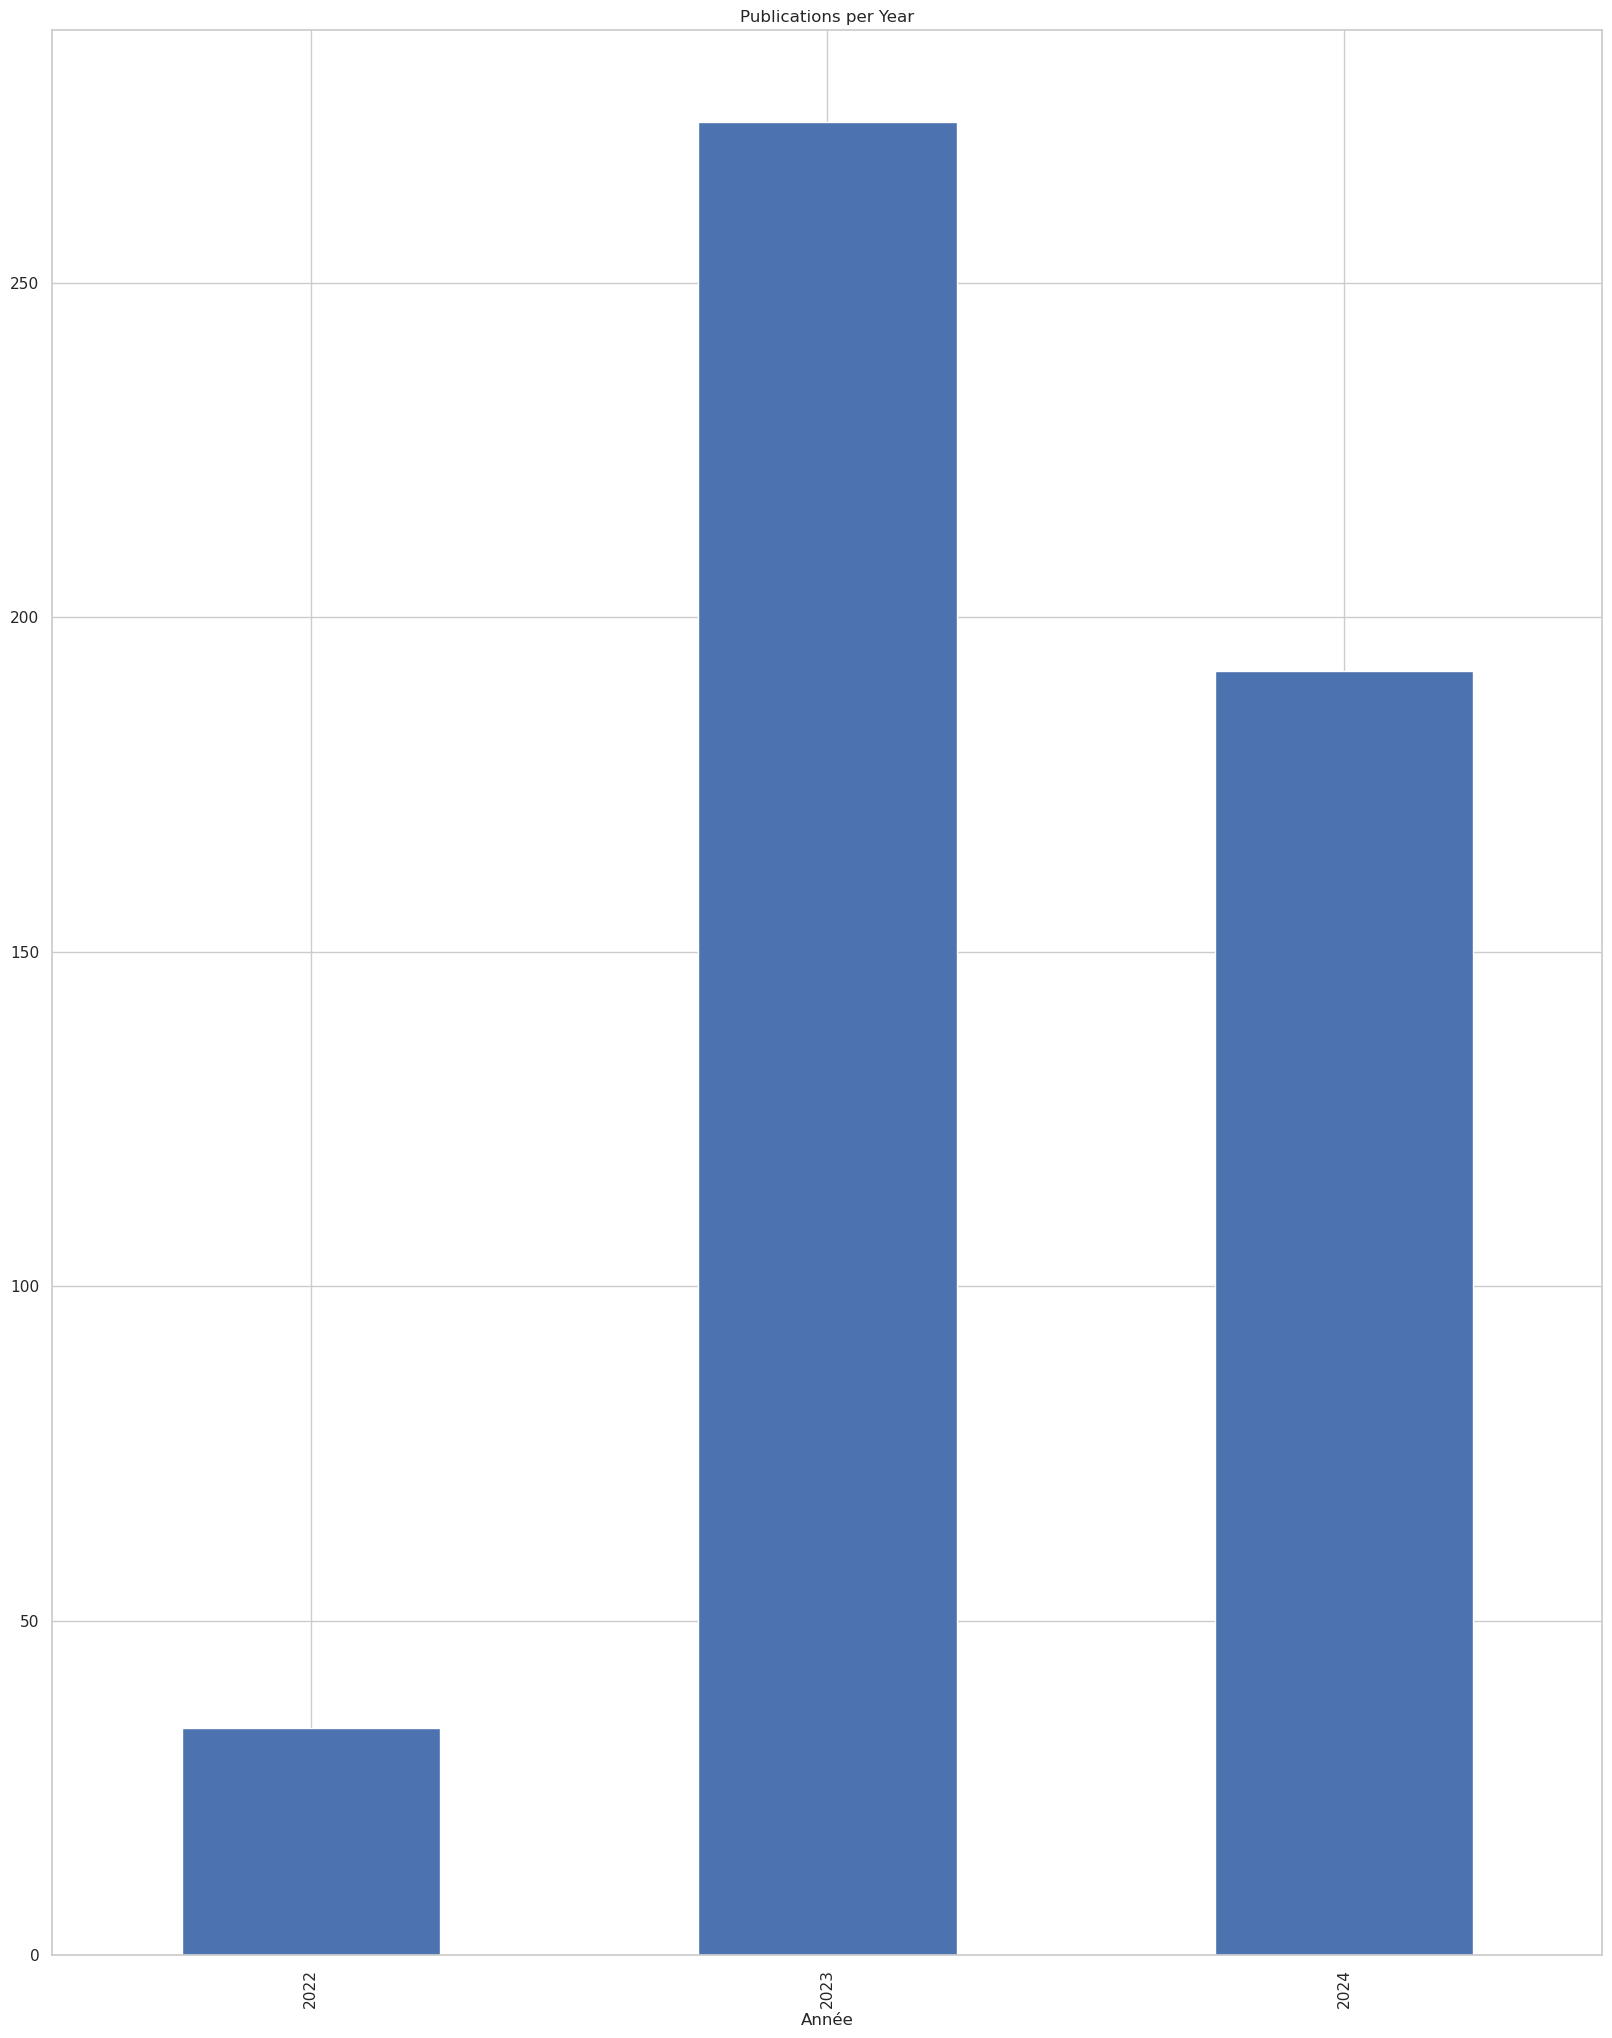

In [40]:

df['Année'].value_counts().sort_index().plot(kind='bar')
plt.title('Publications per Year')


2. Pie Chart: Distribution of publications by `Société` (Publisher/Company)

Text(0.5, 1.0, 'Distribution by Publisher')

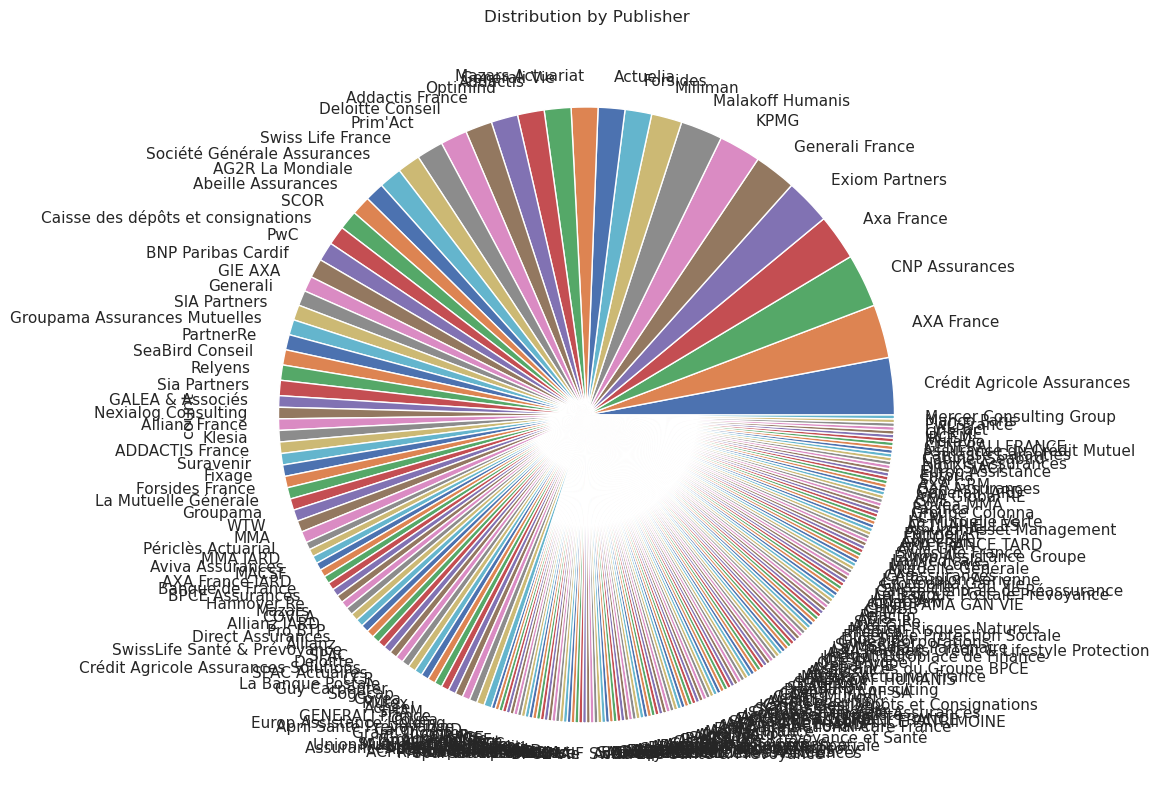

In [42]:
df['Société'].value_counts().plot(kind='pie', figsize=(10,10))
plt.title('Distribution by Publisher')


3. Horizontal Bar Chart: Top 10 most frequent `Auteur`s (Authors)

Text(0.5, 1.0, 'Top 10 Authors')

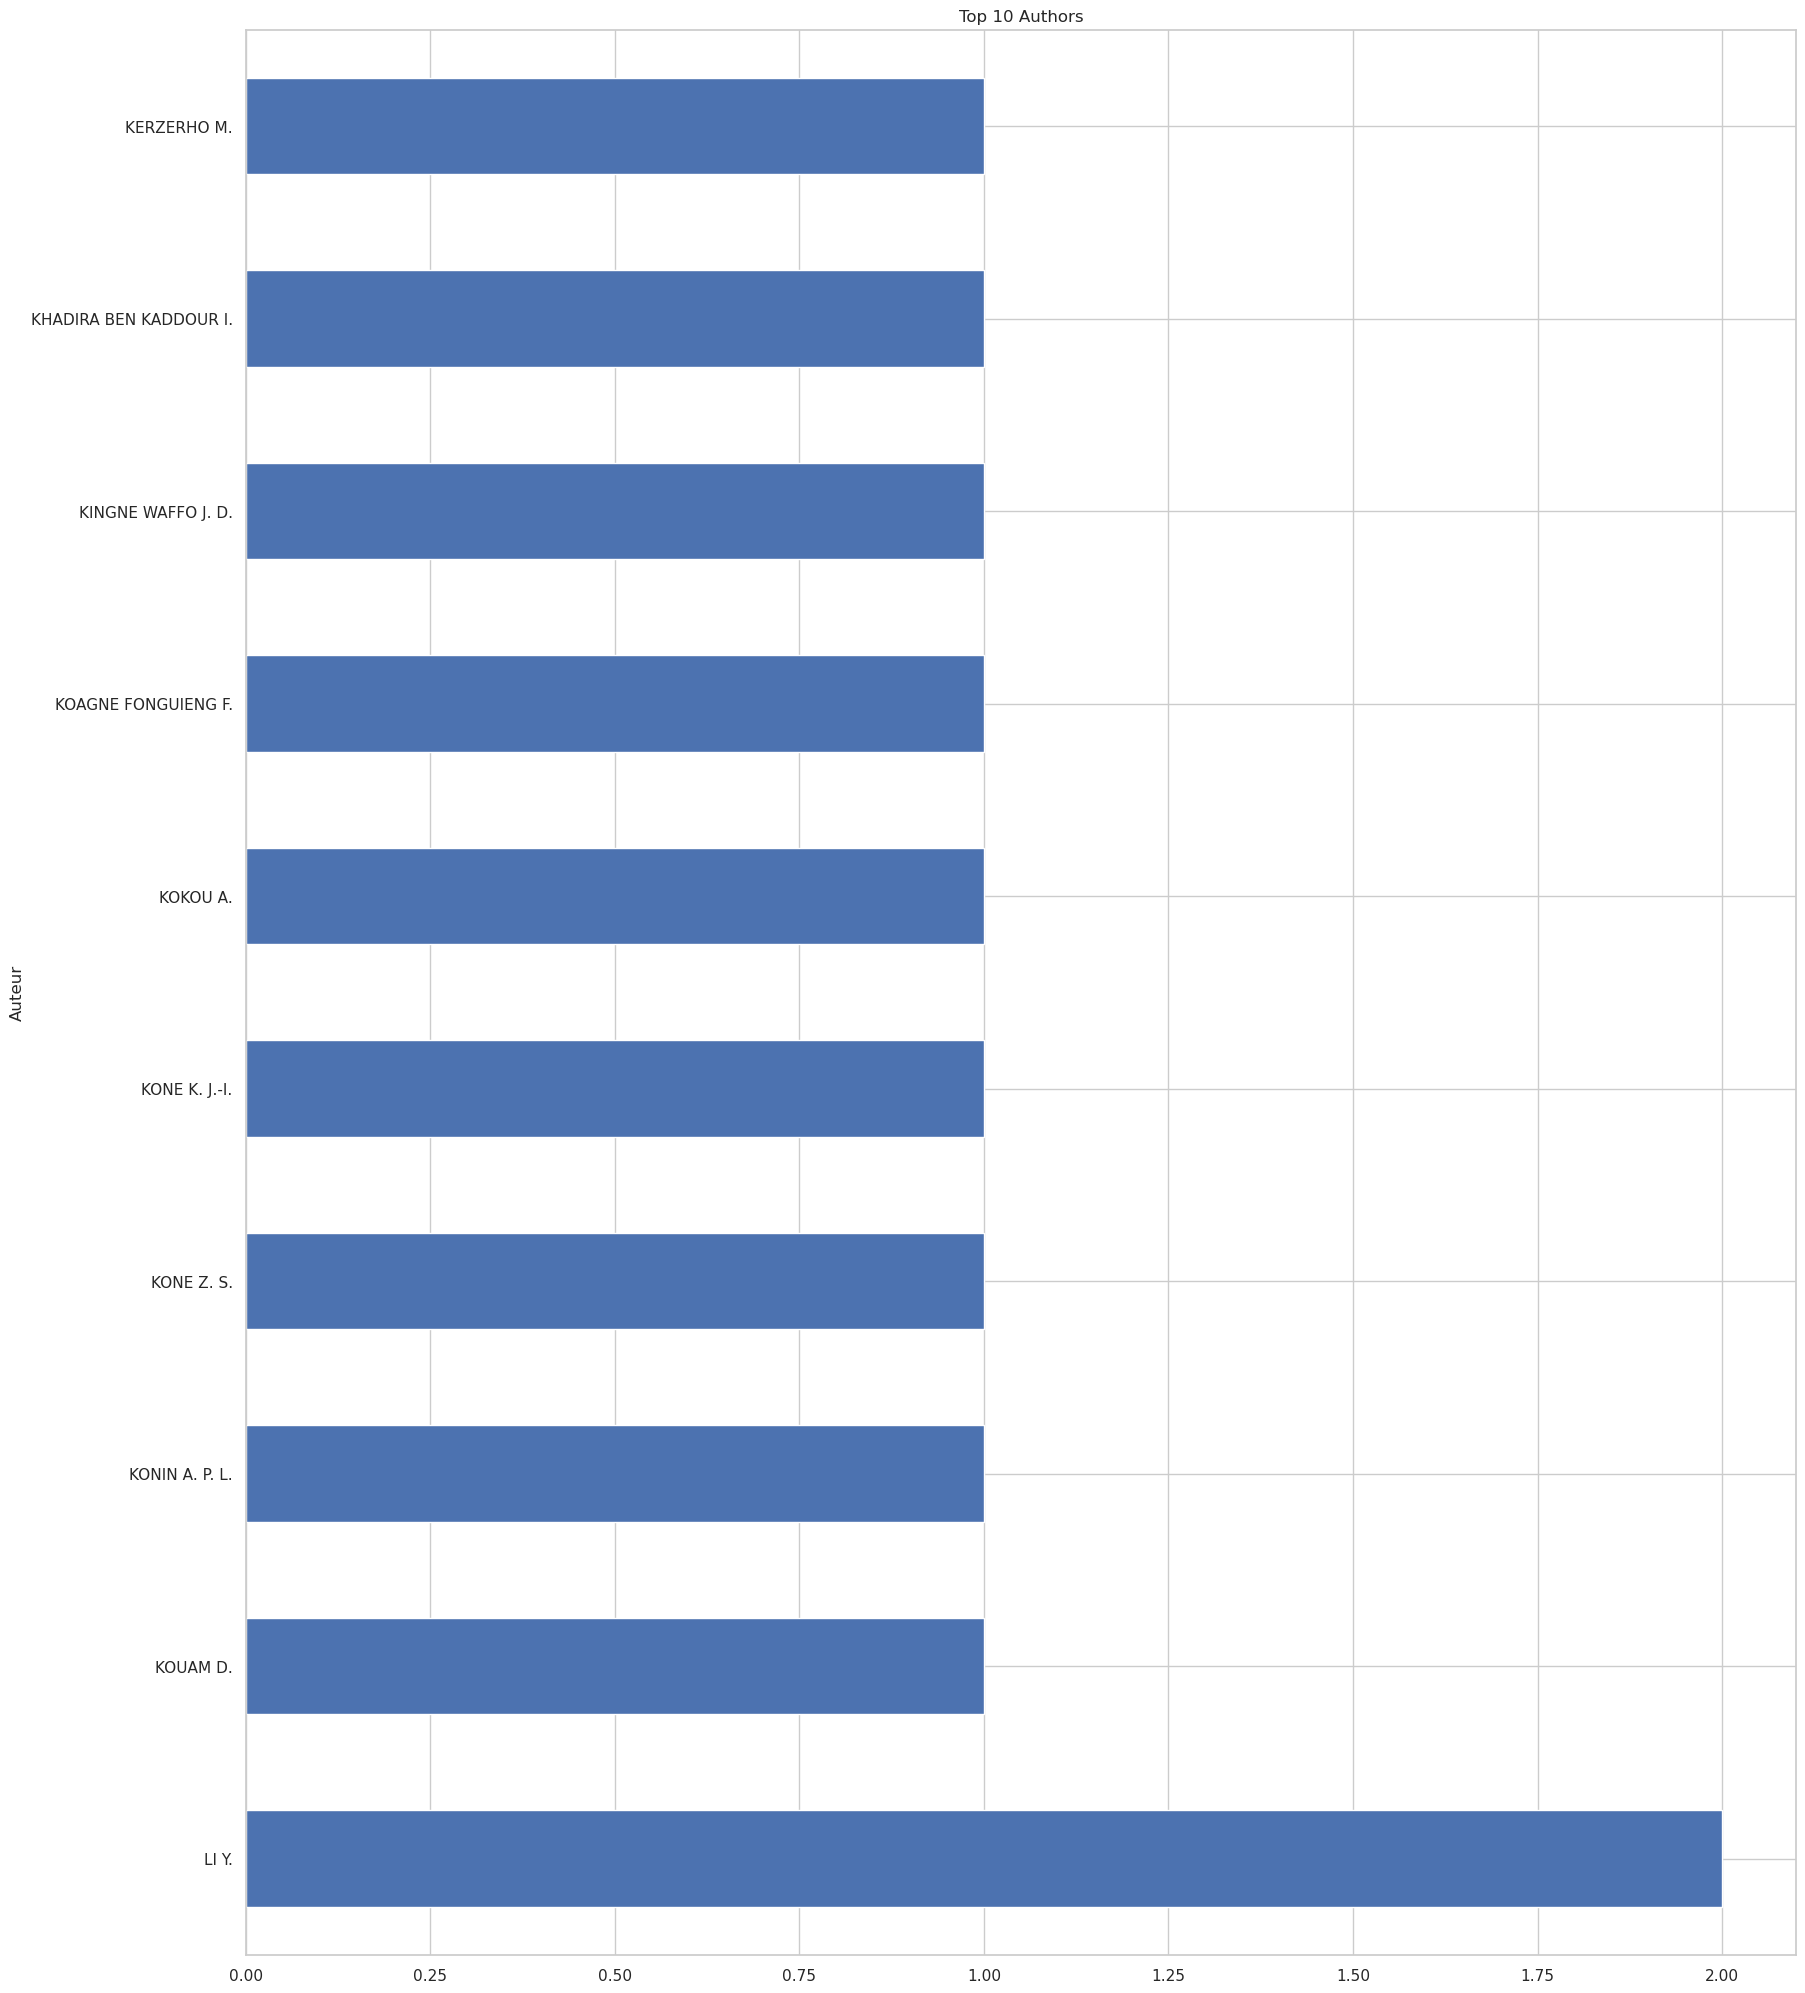

In [44]:
df['Auteur'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Authors')


4. Stacked Bar: Authors vs Years (requires data transformation)

Text(0.5, 1.0, 'Authors Publication Timeline')

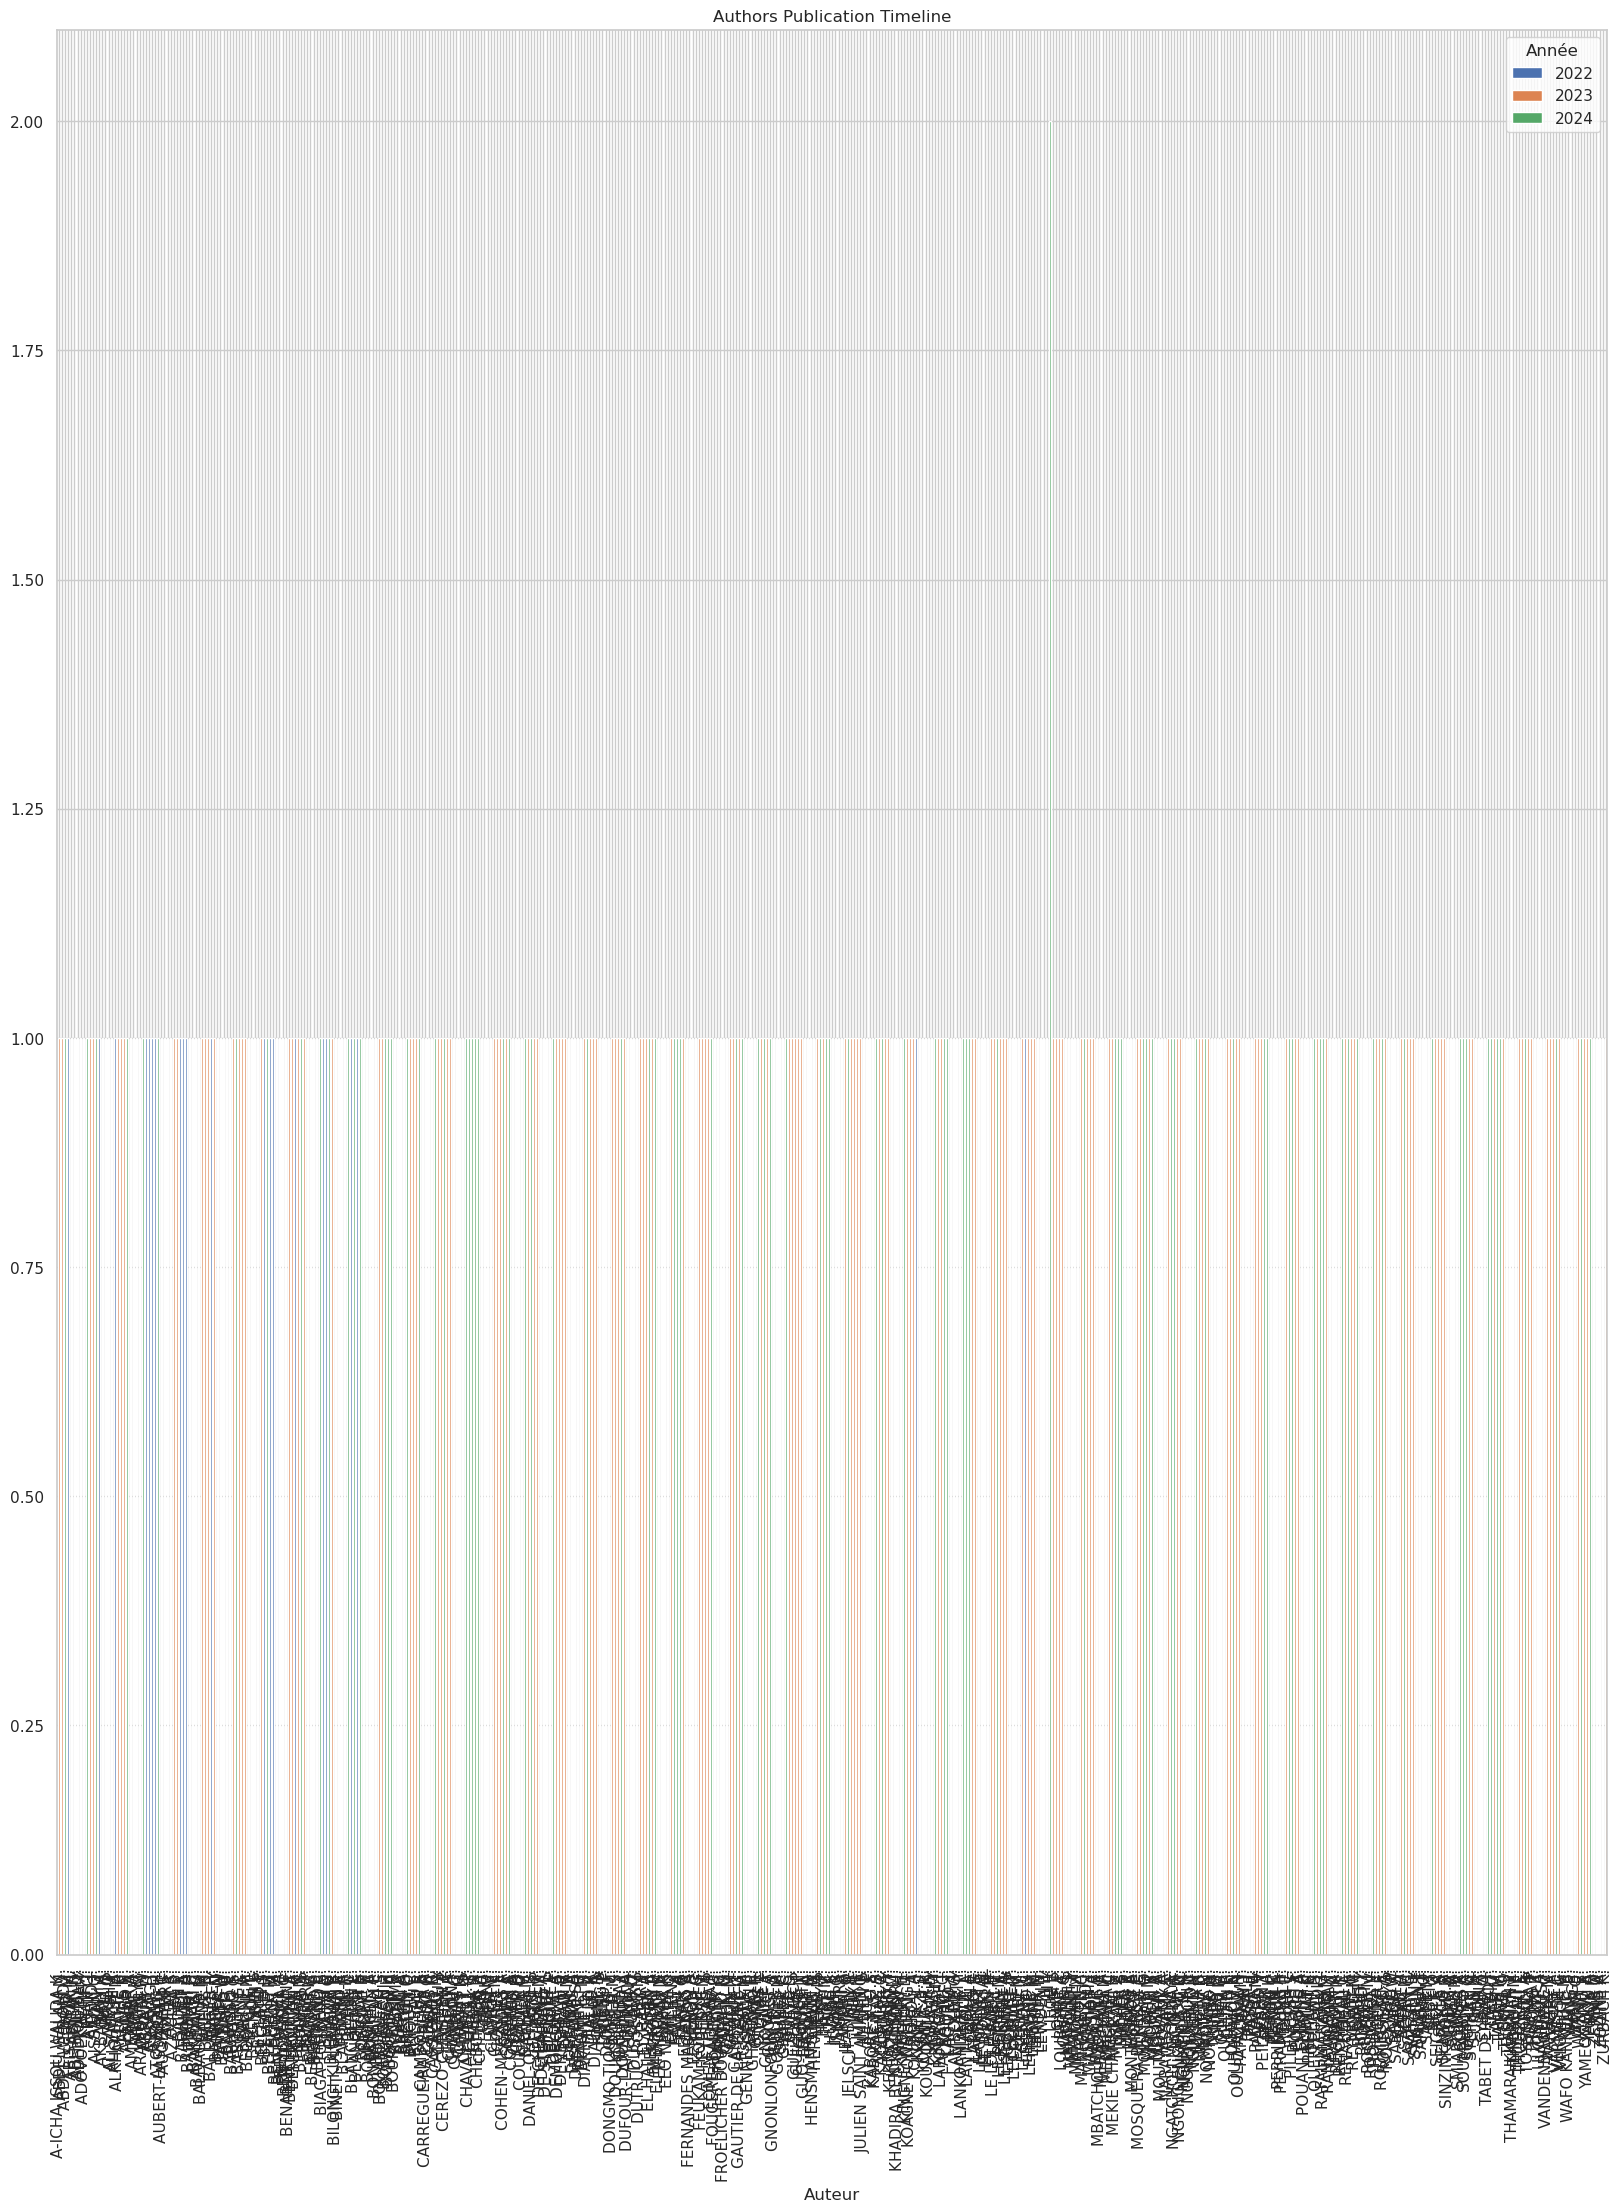

In [48]:
pd.crosstab(df['Auteur'], df['Année']).plot(kind='bar', stacked=True)
plt.title('Authors Publication Timeline')


5. TreeMap (using plotly): Hierarchical view of Société -> Auteur

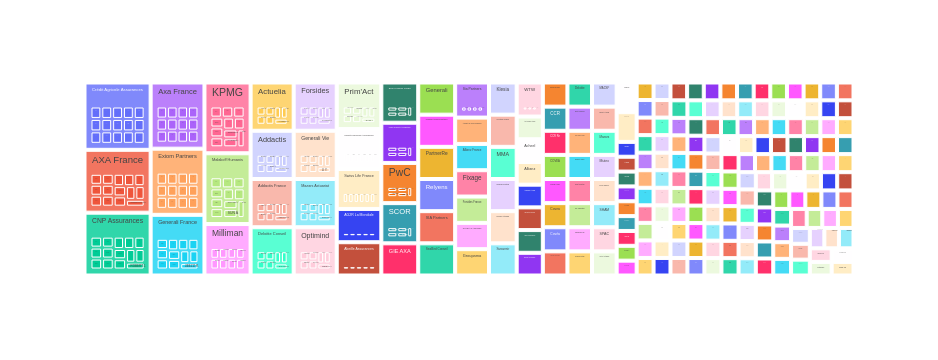

In [50]:
import plotly.express as px
fig = px.treemap(df, path=['Société', 'Auteur'])
fig.show()